<a href="https://colab.research.google.com/github/fereol023/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importation du dataset depuis google drive et lecture**

In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

line = "="*50
sep = "\n"

df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


**a-Exploration**

In [2]:
#description des données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  int64  
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

**b-Data visualisation**

In [4]:
import warnings
warnings.filterwarnings('ignore')

Taille du dataset :  (284807, 31)
Il y a : 492  observations classées dans la classe 1 (fraude).


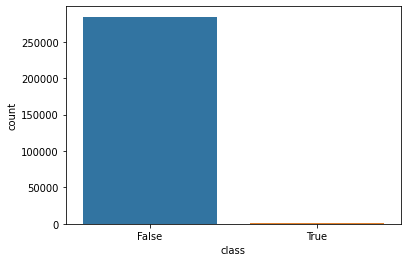

In [5]:
import seaborn as sns

# variable class
target=df["class"]
sns.countplot(target)
print("Taille du dataset : ", df.shape)
print("Il y a :",sum(df["class"])," observations classées dans la classe 1 (fraude).")

In [6]:
target.value_counts()

False    284315
True        492
Name: class, dtype: int64

On remarque que la variable cible est très déséquilibrée entre les deux classes.

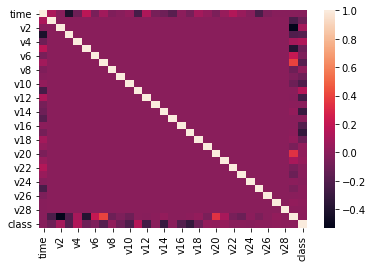

In [7]:
sns.heatmap(df.corr())

**2-Preprocessing**

Nous faisons un preprocessing des données en standardisant toutes les variables pour les ramener à la même échelle : moyenne=0 et variance=1. Puis à partir des données obtenues, nous répartissons les données en train set (70%) puis en test set (30%).

In [8]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

variables_du_modele = df.columns.drop(['class'])
x = df[variables_du_modele]
y = df['class']

# convertir la variable target en numérique binaire
y = LabelBinarizer().fit_transform(y)

# Standardisation de tous les prédicteurs
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(x)
x = pd.DataFrame(scaled_values, columns=x.columns)

# separation en train_test   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)
    
#y_train = y_train.values.reshape((-1,1))
#y_test = y_test.values.reshape((-1,1))

print(line)
print("Taille train set : ", x_train.shape)
s_train = pd.DataFrame(y_train).value_counts()
print(s_train)
print(line)
print("Taille test set : ", x_test.shape)
s_test = pd.DataFrame(y_test).value_counts()
print(s_test)

Taille train set :  (199364, 30)
0    199011
1       353
dtype: int64
Taille test set :  (85443, 30)
0    85304
1      139
dtype: int64


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

y = data.iloc[:,-1]
X = data.iloc[:,:-1]

print("Matrice des X")
print(X)
print(sep)
print(line)
print(y)

y = LabelBinarizer().fit_transform(y)
print(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**3-Modèles à tester :**<br> LR, SGD classifier et Bayésien Naïf<br><br>
Justification :<br> Sachant qu'on a jeu de données de plus de 200 000 observations, il ne serait pas efficace d'utiliser des modèles qui classent les observations en se basant sur leurs distance par rapport aux autres observations du dataset. Cette catégorie de modèles inclut les SVMClassifier, KNN et autres.. le temps de calcul serait trop long pour chacun des outputs.<br><br>
**a-Regression logistique sans validation croisée**

Logistic regression
[[85285    19]
 [   42    97]]
Accuracy score :  99.93  %.
Recall score/taux de vraies fraudes détectées :  69.78  %.
Specificity score/fraudes non détectées :  0.02  %.


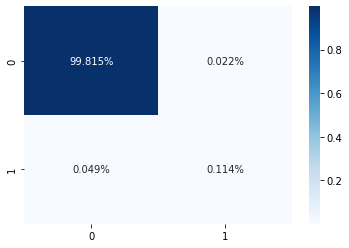

In [9]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estimation LR
clfLR = LogisticRegression()
clfLR.fit(x_train, y_train)
y_pred = clfLR.predict(x_test)

# Evaluation
acc_scoreLR = accuracy_score(y_test, y_pred)
tprLR = recall_score(y_test, y_pred)
cmLR = confusion_matrix(y_test, y_pred)
fprLR = cmLR[0,1]/(cmLR[0,1]+cmLR[0,0])# spécificité
print(line)
print("Logistic regression")
print(cmLR)
print("Accuracy score : ",round(acc_scoreLR*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprLR*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprLR*100,2), " %.")

print(line)
sns.heatmap(cmLR/np.sum(cmLR), annot=True, fmt='.3%', cmap="Blues")
plt.show()

Le modèle LR donne un fort taux d'accuracy (99.93%) mais cela est uniquement dû aux bonnes prédictions dans la classe "Non Fraudes". Le taux de vraies fraudes détectées obtenue grâce au recall (True Positive Rate) n'est pas élevé (69.78%). Le taux de fraudes non détectées (False Positive Rate) quant à lui, est assez faible. Cela pourrait être dû au fait qu'il y a peu de "Fraudes" dans le dataset.<br><br>
**b-Descente de gradient SGD sans validation croisée**

SGD CLassifier
[[85279    25]
 [   20   119]]
Accuracy score :  99.95  %.
Recall score/taux de vraies fraudes détectées :  85.61  %.
Specificity score/fraudes non détectées :  0.03  %.


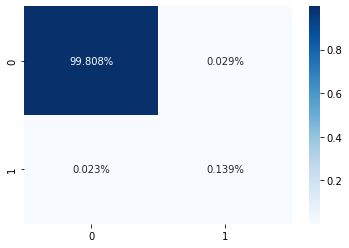

In [10]:
from sklearn.linear_model import SGDClassifier

# Estimation SGDClassifier
clfSGD = SGDClassifier(loss='squared_error', max_iter=1000)
clfSGD = clfSGD.fit(x_train, y_train)
y_pred = clfSGD.predict(x_test)

# Evaluation
acc_scoreSGD = accuracy_score(y_test, y_pred)
tprSGD = recall_score(y_test, y_pred)
cmSGD = confusion_matrix(y_test, y_pred)
fprSGD = cmSGD[0,1]/(cmSGD[0,1]+cmSGD[0,0])# spécificité
print(line)
print("SGD CLassifier")
print(cmSGD)
print("Accuracy score : ",round(acc_scoreSGD*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprSGD*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprSGD*100,2), " %.")

print(line)
sns.heatmap(cmSGD/np.sum(cmSGD), annot=True, fmt='.3%', cmap="Blues")
plt.show()

Nous faisons le même constat sur le SGD. L'accuracy est très bon (99.89%) mais il est biaisé puisque le taux de vraies fraudes détectées est très faible (44.6%) et plus faible que celui de la regression logistique.<br><br>

**c-Bayésien Naïf avec noyau Guassien sans validation croisée**<br>
Nous choisissons de tester ce modèle car les facteurs (V1 à V26) sont tous independants et on note une faible 
corrélation avec les autres varibales (cf. matrice de corrélation). Or l'une des hypothèses de base du Bayésien Naîf est que les prédicteurs soient indépendants afin de pouvoir calculer la probabilité à postériori.

[[83447  1857]
 [   14   125]]
Accuracy score :  97.81  %.
Recall score/taux de vraies fraudes détectées :  89.93  %.
Specificity score/fraudes non détectées :  2.18  %.


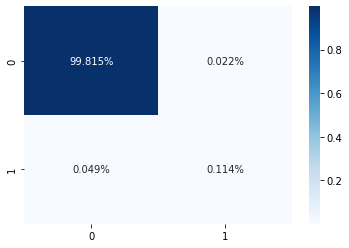

In [11]:
# MODLELE NB 
from sklearn.naive_bayes import GaussianNB

clfGNB = GaussianNB()
clfGNB.fit(x_train, y_train)
y_pred = clfGNB.predict(x_test)

# Evaluation
acc_scoreGNB = accuracy_score(y_test, y_pred)
tprGNB = recall_score(y_test, y_pred)
cmGNB = confusion_matrix(y_test, y_pred)
fprGNB = cmGNB[0,1]/(cmGNB[0,1]+cmGNB[0,0])# spécificité
print(line)
print(cmGNB)
print("Accuracy score : ",round(acc_scoreGNB*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprGNB*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprGNB*100,2), " %.")

print(line)
sns.heatmap(cmLR/np.sum(cmGNB), annot=True, fmt='.3%', cmap="Blues")
plt.show()

Le bayésien naïf à noyau gaussien donne un accuracy inférieur à celui des deux modèles précédents, mais un taux de fraudes détectées bien supérieur (89.93%). Il est à cette étape notre meilleur modèle pour détecter la fraude avec ce dataset.

**4-CROSS VALIDATION :**<br>
Puisqu'il y a de fortes chances que les résultats que nous avons obtenus précédemment soient dûs au hasard de la répartition des données en train set et en test set, nous reprenons chacun des modèles avec la validation croisée (basée sur la méthode du **StratifiedKFold** qui corrige le déséquilibre des classes à chaque répartition). Cette méthode permettra d'obtenir un performance moyenne des modèles avec un écart-type de la performance sur tout le dataset.<br><br> 


**a-CV : Régression logistique**<br>
avec les données normalisées

In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from statistics import mean, stdev
from sklearn.preprocessing import StandardScaler

X1 = x.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)
  
# instanciation du classifier 
lr = LogisticRegression()
  
# instanciation de la classe stratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)
lst_recall_stratified_std = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    lr.fit(x_train_fold, y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_std.append(recall_fold)
  
# output
print(line)
print('Liste des recall score/taux de vraies fraudes détectées :', lst_recall_stratified_std)
print('Maximum recall :', max(lst_recall_stratified_std)*100, '%')
print('Minimum recall :', min(lst_recall_stratified_std)*100, '%')
print('Recall Moyen :', mean(lst_recall_stratified_std)*100, '%')
print('Standard Deviation :', stdev(lst_recall_stratified_std))

Liste des recall score/taux de vraies fraudes détectées : [0.4897959183673469, 0.673469387755102, 0.6326530612244898, 0.673469387755102, 0.5306122448979592, 0.56, 0.68, 0.6122448979591837, 0.6938775510204082, 0.6530612244897959]
Maximum recall : 69.38775510204081 %
Minimum recall : 48.97959183673469 %
Recall Moyen : 61.991836734693884 %
Standard Deviation : 0.07042122196425299


avec les données standardisées

In [13]:
from sklearn.preprocessing import MinMaxScaler

X1 = df[variables_du_modele].copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# instanciation du classifier 
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

# instanciation du classifier 
lr = LogisticRegression()
  
# instanciation de la classe stratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)
lst_recall_stratified_mms = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    lr.fit(x_train_fold, y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_mms.append(recall_fold)
  
# output
print(line)
print('Liste des recall score/taux de vraies fraudes détectées :', lst_recall_stratified_mms)
print('Maximum recall :', max(lst_recall_stratified_mms)*100, '%')
print('Minimum recall:', min(lst_recall_stratified_mms)*100, '%')
print('Recall moyen :', mean(lst_recall_stratified_mms)*100, '%')
print('Standard Deviation :', stdev(lst_recall_stratified_mms))

Liste des recall score/taux de vraies fraudes détectées : [0.3877551020408163, 0.5918367346938775, 0.5714285714285714, 0.6326530612244898, 0.5102040816326531, 0.48, 0.58, 0.5102040816326531, 0.5918367346938775, 0.5918367346938775]
Maximum recall : 63.26530612244898 %
Minimum recall: 38.775510204081634 %
Recall moyen : 54.477551020408164 %
Standard Deviation : 0.072693827896105


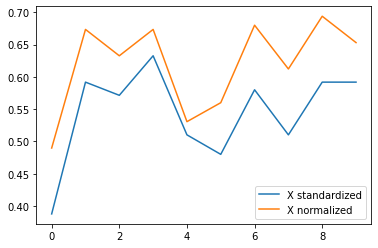

In [14]:
plt.plot(lst_recall_stratified_mms)
plt.plot(lst_recall_stratified_std)
plt.legend(['X standardized', 'X normalized'])
plt.show()

On constate qu'avec les données normalisées on a un meilleur score à chaque tour de la validation croisée. De plus **avec les données normalisées, la regression logistique détecte en moyenne 61.99% de "fraudes avec 0.07 d'écart-type"**. Les deux types de données donnent des écarts types similaires (0.07). 

**b-CROSS VALIDATION : SGD** avec données normalisées

In [15]:
X1 = x.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)
  
# classifier
sgd = SGDClassifier(loss='squared_error', max_iter=50000)

# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_std = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    sgd.fit(x_train_fold, y_train_fold)
    y_pred_fold = sgd.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_std.append(recall_fold)
  
# output
print(sep)
print(line)
print('Liste des recall :', lst_recall_stratified_std)
print('Maximum recall :', max(lst_recall_stratified_std)*100, '%')
print('Minimum recall :', min(lst_recall_stratified_std)*100, '%')
print('Overall recall :', mean(lst_recall_stratified_std)*100, '%')
print('Standard Dev :', stdev(lst_recall_stratified_std))



Liste des recall : [0.30612244897959184, 0.0, 0.5510204081632653, 0.0, 0.32653061224489793, 0.72, 0.28, 0.5510204081632653, 0.4897959183673469, 0.0]
Maximum recall : 72.0 %
Minimum recall : 0.0 %
Overall recall : 32.244897959183675 %
Standard Dev : 0.25917535294730887


In [ ]:
X1 = df[variables_du_modele].copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Scaling 
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
  
# classifier
sgd = SGDClassifier(loss='squared_error', max_iter=50000)
  
# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_mms = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    sgd.fit(x_train_fold, y_train_fold)
    y_pred_fold = sgd.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_mms.append(recall_fold)
  
# output
print(sep)
print(line)
print('List des recalls :', lst_recall_stratified_mms)
print('Maximum recall :', max(lst_recall_stratified_mms)*100, '%')
print('Minimum recall:', min(lst_recall_stratified_mms)*100, '%')
print('Recall moyen :', mean(lst_recall_stratified_mms)*100, '%')
print('Standard Dev :', stdev(lst_recall_stratified_mms))

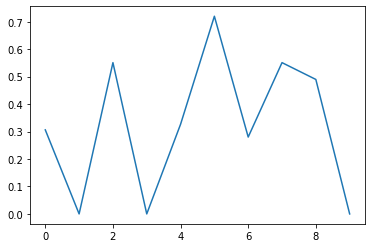

In [16]:
#plt.plot(lst_recall_stratified_mms)
plt.plot(lst_recall_stratified_std)
#plt.legend(['X standardized', 'X normalized'])
plt.show()

Demande beaucoup d'itérations pour que certains tours de la validation croisée aboutissent. 

**c-Bayésien Naïf à noyau gaussien :**<br>avec données normalisées

In [21]:
X1 = x.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)
  
# classifier
gnb = GaussianNB()

# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_std = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    gnb.fit(x_train_fold, y_train_fold)
    y_pred_fold = gnb.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_std.append(recall_fold)
  
# output
print(line)
print('Liste des recall :', lst_recall_stratified_std)
print('Maximum recall :', max(lst_recall_stratified_std)*100, '%')
print('Minimum recall :', min(lst_recall_stratified_std)*100, '%')
print('Overall recall :', mean(lst_recall_stratified_std)*100, '%')
print('Standard Dev :', stdev(lst_recall_stratified_std))

Liste des recall : [0.8367346938775511, 0.7755102040816326, 0.8571428571428571, 0.8571428571428571, 0.8163265306122449, 0.78, 0.88, 0.7959183673469388, 0.8163265306122449, 0.8775510204081632]
Maximum recall : 88.0 %
Minimum recall : 77.55102040816327 %
Overall recall : 82.9265306122449 %
Standard Dev : 0.038411731937606934


avec données standardisées

In [25]:
X1 = df[variables_du_modele].copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Scaling 
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
  
# classifier
gnb = GaussianNB()
  
# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_mms = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    gnb.fit(x_train_fold, y_train_fold)
    y_pred_fold = gnb.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_mms.append(recall_fold)
  
# output
print(line)
print('List des recalls :', lst_recall_stratified_mms)
print('Maximum recall :', max(lst_recall_stratified_mms)*100, '%')
print('Minimum recall:', min(lst_recall_stratified_mms)*100, '%')
print('Recall moyen :', mean(lst_recall_stratified_mms)*100, '%')
print('Standard Dev :', stdev(lst_recall_stratified_mms))

List des recalls : [0.8367346938775511, 0.7755102040816326, 0.8571428571428571, 0.8571428571428571, 0.8163265306122449, 0.78, 0.88, 0.7959183673469388, 0.8163265306122449, 0.8775510204081632]
Maximum recall : 88.0 %
Minimum recall: 77.55102040816327 %
Recall moyen : 82.9265306122449 %
Standard Dev : 0.038411731937606934


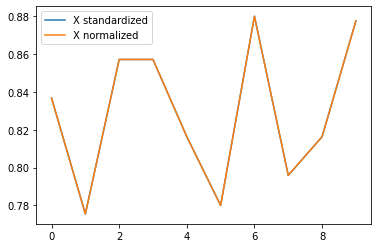

In [23]:
plt.plot(lst_recall_stratified_mms)
plt.plot(lst_recall_stratified_std)
plt.legend(['X standardized', 'X normalized'])
plt.show()

**Conclusion partielle :**<br> 
Bayésien naïf meilleur

**Réseaux de neuronnes**<br>
Nous allons programmer un réseau de neuronnes simple à 4 couches à partir de la librarie keras de tensorflow. Nous comparerons par la suite les métriques recall et fpr à celles des modèle LR, Descente de Gradient et Naïve Bayesien.

In [26]:
EPOCHS = 100
BATCH_SIZE = 256
display_graphs = True

In [27]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Loss func : binary crossentropy car la variable target est binaire (0 ou 1)
Activation function dernière couche : sigmoïd car c'est la seule compatible avec la BC. 
nb_entries : nbre de prédicteurs
Early stopping : pour que le paramètre évalué par la loss func ne soit plus optimisé dès lors que la valeur de la loss func commence à augmenter

In [29]:
# RN

model = Sequential()
    
nb_entries = 30
nb_neurons_hidden_layer_1, nb_neurons_hidden_layer_2 = 64, 16  # décroissant
    
model.add(Dense(nb_neurons_hidden_layer_1, input_dim = nb_entries, activation = "relu"))
model.add(Dropout(0.5)) # extinction aléatoire de la moitié des neuronnes pour contrôler le sur apprentissage
model.add(Dense(nb_neurons_hidden_layer_2, activation = "softplus"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))
    
model.compile(loss="binary_crossentropy",
                  optimizer=Adam(learning_rate=0.005),
                  metrics=["accuracy", 
                           tensorflow.keras.metrics.Recall(name='recall'), 
                           tensorflow.keras.metrics.FalsePositives(name="fp"), 
                           tensorflow.keras.metrics.TrueNegatives(name="tn")])

# apprentissage
history = model.fit(x_train, y_train, 
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, 
                    verbose = 0, validation_data=(x_train, y_train))

# affichage des metriques disponibles 
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'recall', 'fp', 'tn', 'val_loss', 'val_accuracy', 'val_recall', 'val_fp', 'val_tn'])


# recall : 
#tf.keras.metrics.FalsePositives(name="fp"), tf.keras.metrics.TrueNegatives(name="tn")  ## fpr = fp/(fp+tn) : fraudes non détectées

model_file_name = 'fraud_detec_pred_best.hdf5'
    
cb_check = ModelCheckpoint(model_file_name,
                           monitor = 'val_recall',
                           mode = 'max',
                           verbose = 1,
                           save_best_only = True)
    
cb_early = EarlyStopping(monitor = 'val_recall',
                         min_delta = 0.1,
                         patience = 20)
    
# callbacks
callbacks_list = [cb_check, cb_early]
  

In [30]:
# dernier recall de l'apprentissage sur les train set
last_recall = history.history["recall"][-1]
print(last_recall)       

0.6968838572502136


In [31]:
model.evaluate(x_train, y_train)

6231/6231 [==============================] - 12s 2ms/step - loss: 0.0014 - accuracy: 0.9994 - recall: 0.7224 - fp: 15.0000 - tn: 198996.0000


[0.0014267046935856342, 0.9994332194328308, 0.7223796248435974, 15.0, 198996.0]

In [32]:
model.evaluate(x_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0188 - accuracy: 0.9994 - recall: 0.7050 - fp: 11.0000 - tn: 85293.0000


[0.018765326589345932, 0.9993914365768433, 0.7050359845161438, 11.0, 85293.0]

In [33]:
def rapport(X, y, title) :
    global model
        
    print(line)
    print(title)
        
    loss, acc, rec, fp, tn = model.evaluate(X, y, verbose=0)
    print("Accuracy = ", acc*100.0," %")
    print("Recall = ", rec*100.0," %")
    print("Fonction de perte = ", loss) 
    # calcul des fpr
    ## fpr = fp/(fp+tn) : fraudes non détectées
    print("FPR : taux de fraudes non détectées = ", (fp/(fp+tn))*100, " %")

# IMPLEMENTATION
    
rapport(x_train, y_train, "Train set")
rapport(x_test, y_test, "Test set")
    
accuracy_vect = history.history['accuracy']
recalls_vect = history.history['recall']
loss_vect = history.history['loss']
fp_vect = history.history['fp']
tn_vect = history.history['tn']

print(line)
index = np.argmax(recalls_vect)
print("meilleure epoch = ", index) 
print("meilleur recall (train set) = ", recalls_vect[index])
print("accuracy correspondant (train set) = ", accuracy_vect[index])
print("loss correspondant = ", loss_vect[index])


print(line)


Train set
Accuracy =  99.94332194328308  %
Recall =  72.23796248435974  %
Fonction de perte =  0.0014267046935856342
FPR : taux de fraudes non détectées =  0.007537271809095979  %
Test set
Accuracy =  99.93914365768433  %
Recall =  70.50359845161438  %
Fonction de perte =  0.018765326589345932
FPR : taux de fraudes non détectées =  0.012895057676076151  %
meilleure epoch =  40
meilleur recall (train set) =  0.6997166872024536
accuracy correspondant (train set) =  0.9993479251861572
loss correspondant =  0.003034581197425723


AFFICHAGE DU RESULTAT


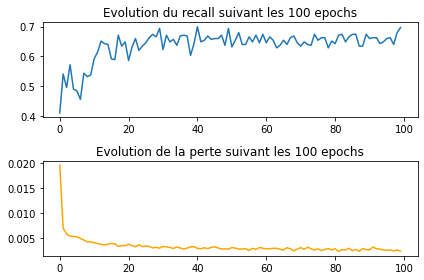

In [34]:
# AFFICHAGE DU RESULTAT
    
print(line)
print("AFFICHAGE DU RESULTAT")
    
    
figure, axis = plt.subplots(2, 1)
epochs_vect = np.arange(0, EPOCHS, 1)
# recall
axis[0].plot(epochs_vect, recalls_vect)
axis[0].set_title("Evolution du recall suivant les 100 epochs")
    
# loss
axis[1].plot(epochs_vect, loss_vect, color = 'orange')
axis[1].set_title("Evolution de la perte suivant les 100 epochs")
figure.tight_layout()
plt.show()

**Conclusion :**<br>